In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('AB_Test_Results.csv')
df.sample(5)

,USER_ID,VARIANT_NAME,REVENUE
5619,2600,variant,0.0
1801,963,control,0.0
7181,4962,variant,0.0
3864,8840,variant,0.0
6473,2399,control,0.0


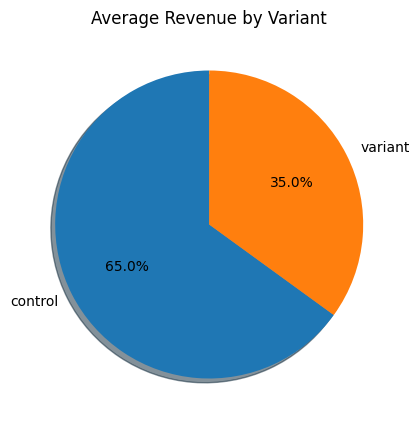

In [30]:
#get average revenue by variant, format the number to 2 decimal places
avg_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean().round(2)
avg_revenue.head()

#plot pie chart
plt.figure(figsize=(5,5))
plt.pie(avg_revenue, labels=avg_revenue.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Average Revenue by Variant')
plt.show()

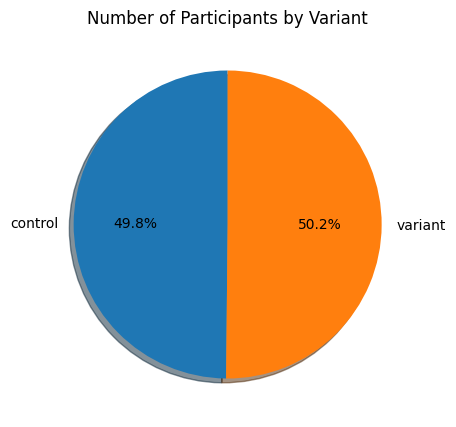

In [22]:
number_of_participants = df.groupby('VARIANT_NAME').count()['USER_ID']

#plot chart for number of participants
plt.figure(figsize=(5,5))
plt.pie(number_of_participants, labels=number_of_participants.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Number of Participants by Variant')
plt.show()

In [23]:
#add a new column 'CONVERSION' , if 'REVENUE' is 0 then 'CONVERSION' is 0, else 1
df['CONVERSION'] = df['REVENUE'].apply(lambda x: 0 if x == 0 else 1)
df.head() 

,USER_ID,VARIANT_NAME,REVENUE,CONVERSION
0,737,variant,0.0,0
1,2423,control,0.0,0
2,9411,control,0.0,0
3,7311,control,0.0,0
4,6174,variant,0.0,0


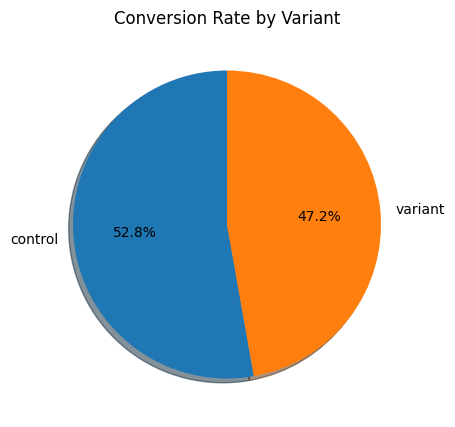

In [35]:
#calculate the conversion rate
conversion_rate = df.groupby('VARIANT_NAME').mean()['CONVERSION']

#plot chart for conversion rate
plt.figure(figsize=(5,5))
plt.pie(conversion_rate, labels=conversion_rate.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Conversion Rate by Variant')
plt.show()


In [37]:
#calculate the lift between variants
variant_a = df[df['VARIANT_NAME'] == 'A']
variant_b = df[df['VARIANT_NAME'] == 'B']

#lift of variants
lift = (variant_b['CONVERSION'].mean() - variant_a['CONVERSION'].mean()) / variant_a['CONVERSION'].mean()

nan

In [43]:
#create a column named date and populate it with random dates, within a range of 30 days
import random
import datetime

start_date = datetime.date(2023, 10, 1)
end_date = datetime.date(2023, 9, 30)

date_list = []
for i in range(0, 10000):
    random_date = start_date + datetime.timedelta(days=random.randint(0, 29))
    date_list.append(random_date)

df['DATE'] = date_list
df.head()

,USER_ID,VARIANT_NAME,REVENUE,CONVERSION,DATE
0,737,variant,0.0,0,2023-10-07
1,2423,control,0.0,0,2023-10-25
2,9411,control,0.0,0,2023-10-07
3,7311,control,0.0,0,2023-10-12
4,6174,variant,0.0,0,2023-10-13


In [49]:

#convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

#truncate the date so we have columns for day, month and year and week
df['DAY'] = df['DATE'].dt.day
df['WEEK'] = df['DATE'].dt.isocalendar().week
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df.head()

,USER_ID,VARIANT_NAME,REVENUE,CONVERSION,DATE,DAY,MONTH,YEAR,WEEK
0,737,variant,0.0,0,2023-10-07,7,10,2023,40
1,2423,control,0.0,0,2023-10-25,25,10,2023,43
2,9411,control,0.0,0,2023-10-07,7,10,2023,40
3,7311,control,0.0,0,2023-10-12,12,10,2023,41
4,6174,variant,0.0,0,2023-10-13,13,10,2023,41


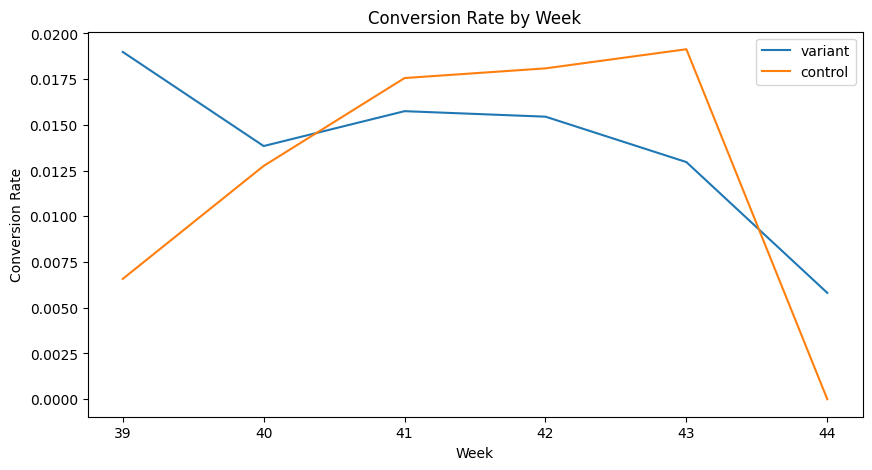

In [52]:
#calculate the conversion rate by week
conversion_rate_by_week = df.groupby(['VARIANT_NAME', 'WEEK']).mean()['CONVERSION']

#plot into a line chart
plt.figure(figsize=(10,5))
plt.plot(conversion_rate_by_week['variant'], label='variant')
plt.plot(conversion_rate_by_week['control'], label='control')
plt.legend()
plt.title('Conversion Rate by Week')
plt.xlabel('Week')
plt.ylabel('Conversion Rate')
plt.show()
